In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les donn√©es 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# inspecter les donn√©es
train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

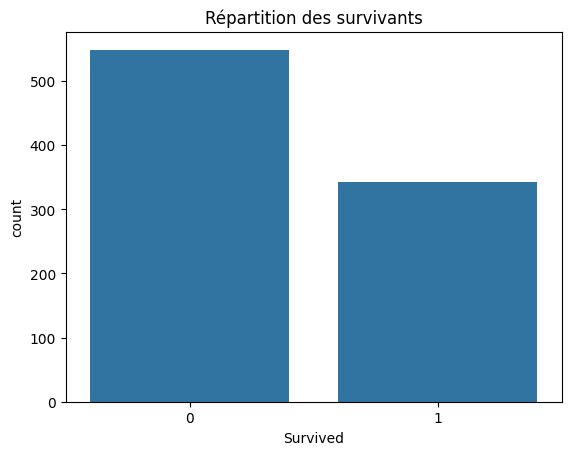

In [124]:
#import seaborn as sns
import matplotlib.pyplot as plt
#combien de survivants vs non-survivants
sns.countplot(x='Survived', data=train)
plt.title('R√©partition des survivants')
plt.show()
#sns.countplot¬†: cr√©e un graphique de comptage pour la colonne ¬´¬†Survived¬†¬ª dans le DataFrame du train.
#plt.title¬†: ajoute le titre ¬´¬†R√©partition des survivants¬†¬ª au graphique.

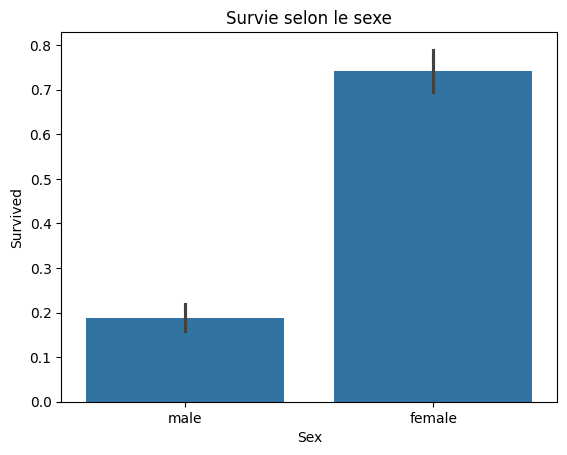

In [125]:
# survie selon de variable
# selon variable sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Survie selon le sexe")
plt.show()

Questions √† analyser  :

Pourqoui les femmes ont-elles eu un taux de survie plus √©lev√© que les hommes ?
- Oui, les femmes ont eu un taux de survie plus √©lev√© que les hommes.

Peut-on dire que le sexe est un facteur important dans la survie ?
- Oui, le sexe est un facteur important dans la survie des passagers.

Est-ce que la variable Sex est discriminante pour un mod√®le pr√©dictif ?
- Oui, la variable Sex est discriminante dans un mod√®le pr√©dictif.

Quelles hypoth√®ses  expliquer ces r√©sultats (femmes et enfants d‚Äôabord) ?
- oui peut etre 

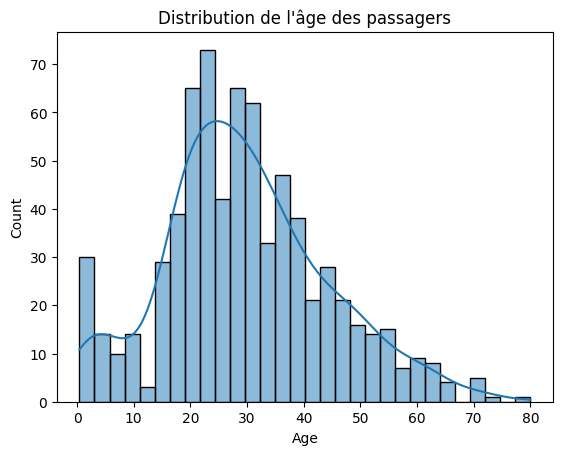

In [126]:
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title("Distribution de l'√¢ge des passagers")
plt.show()


l'age dans titanic :
Y a-t-il beaucoup de passagers tr√®s jeunes (enfants) ? De personnes √¢g√©es ?
- Oui, on observe une quantit√© non n√©gligeable de passagers entre 0 et 10 ans

Quel est l‚Äô√¢ge moyen et l‚Äô√¢ge le plus fr√©quent ?
- √Çge moyen est environ 29 ans, √Çge le plus fr√©quent (mode) c'est  Environ 24 ans.

Y a-t-il des valeurs extr√™mes (outliers) √† prendre en compte ?
-  Oui, certains passagers ont plus de 70 ans, mais ils sont tr√®s peu nombreux.

La r√©partition semble-t-elle normale, asym√©trique ou bimodale ?
- Elle est asym√©trique vers la droite (plus de jeunes que de vieux), et pas tout √† fait normale.

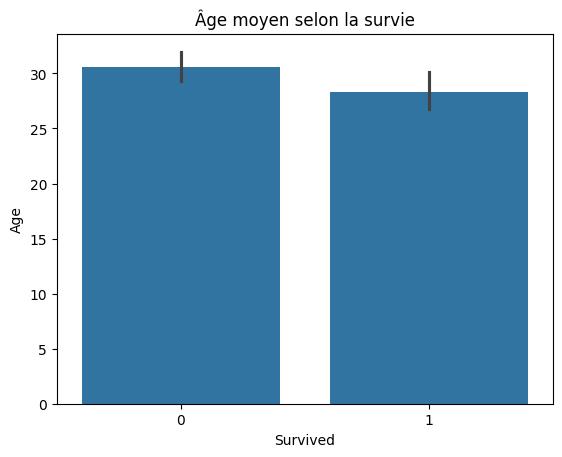

In [127]:
sns.barplot(x='Survived', y='Age', data=train)
plt.title("√Çge moyen selon la survie")
plt.show()

Les survivants sont-ils en moyenne plus jeunes que les non-survivants ?
- √Çge moyen des survivants est environ 28 ans, et l'age moyen des non-survivants est Environ 30 ans.

Peut-on en conclure que l'√¢ge influence la survie ?
- on peut conclure que  L'√¢ge n‚Äôa pas un tr√®s grand impact sur la survie en moyenne.

Cela peut-il √™tre d√ª √† la priorit√© donn√©e aux enfants lors de l'√©vacuation ?
- Les enfants tr√®s jeunes ont √©t√© parfois privil√©gi√©s, mais cela ne se refl√®te pas forc√©ment dans la moyenne globale.

/tmp/ipykernel_922/772505926.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Survived'] == 1]['Age'], label='Surv√©cu', shade=True)
/tmp/ipykernel_922/772505926.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Survived'] == 0]['Age'], label='Non surv√©cu', shade=True)


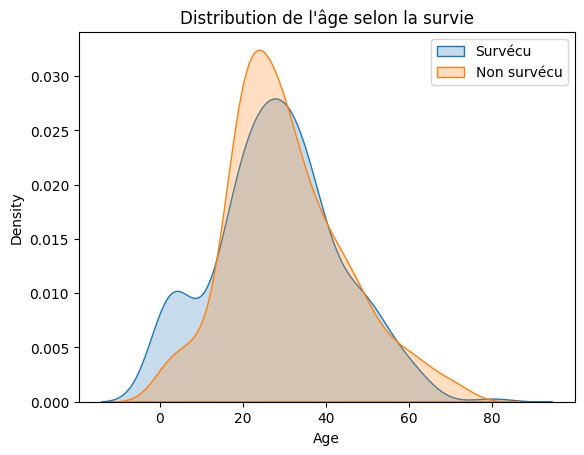

In [128]:
# (sns) : Biblioth√®que Seaborn 
#kdeplot() trace une courbe de densit√© (KDE = Kernel Density Estimate) de la colonne Age pour les passagers qui ont surv√©cu (Survived == 1).
#shade=True:  remplit la zone sous la courbe pour donner un effet visuel plus clair.

sns.kdeplot(train[train['Survived'] == 1]['Age'], label='Surv√©cu', shade=True)
sns.kdeplot(train[train['Survived'] == 0]['Age'], label='Non surv√©cu', shade=True)
plt.title("Distribution de l'√¢ge selon la survie")
plt.legend()
plt.show()

analyse de graphique :

√Ä quels √¢ges observe-t-on les plus fortes densit√©s de survie ?
- On remarque un pic de densit√© chez les survivants pour les Enfants autour de 5 ans et adultes jeunes entre 20‚Äì35 ans.

Les enfants (0‚Äì10 ans) ont-ils eu un meilleur taux de survie ?
- l√©g√®rement, mais ce n‚Äôest pas massif

La survie semble-t-elle favoris√©e dans une certaine tranche d‚Äô√¢ge ?
- oui, Les jeunes adultes (20‚Äì35 ans).

Observe-t-on un chevauchement important entre les deux courbes ?
- Oui, les courbes se recoupent fortement. Donc l‚Äô√¢ge seul ne permet pas de pr√©dire facilement la survie.

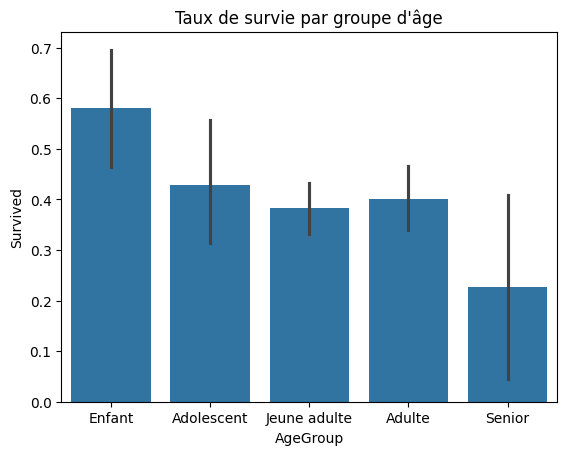

In [129]:
#Cat√©gorisation de l‚Äô√¢ge
#cr√©ation des tranches d‚Äô√¢ge pour voir plus clairement l‚Äôeffet

train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 100], 
                           labels=['Enfant', 'Adolescent', 'Jeune adulte', 'Adulte', 'Senior'])

sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.title("Taux de survie par groupe d'√¢ge")
plt.show()


Quel groupe d‚Äô√¢ge a le plus haut taux de survie ?
- le groupe des enfants (0‚Äì12 ans) ont le taux le plus √©lev√© (~60%).

Groupe avec le taux le plus faible?
- Les seniors (>60 ans) ont un taux de survie tr√®s bas.

Y a-t-il une diff√©rence tr√®s marqu√©e entre enfants et adultes ?
- Oui, les enfants sont privil√©gi√©s, les jeunes adultes et adultes ont un taux mod√©r√© (~35%), les adolescents sont au milieu (~40%).

Peut-on dire que l‚Äô√¢ge est une variable discriminante √† introduire dans le mod√®le ?
-Oui, l'√¢ge est une variable int√©ressante, mais pas suffisante seule. Elle doit √™tre combin√©e avec le sexe et la classe pour un mod√®le plus efficace.

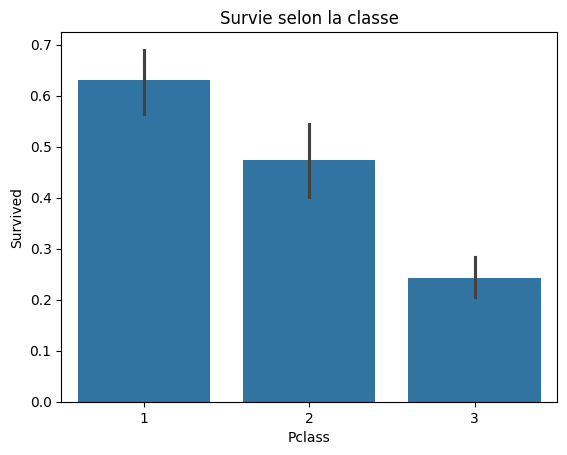

In [130]:
# selon variable Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Survie selon la classe")
plt.show()

Les passagers de premi√®re classe ont-ils plus surv√©cu que ceux de 3e classe ?
- Oui, les passagers de premi√®re classe ont eu un taux de survie plus √©lev√© que ceux de 3e classe.

Est-ce que le niveau de confort (ou la proximit√© avec les canots) a pu influencer le taux de survie ?
- Oui, le niveau de confort et la proximit√© des canots ont probablement influenc√© le taux de survie.

Peut-on dire que la variable Pclass est aussi importante que Sex ?
- la variable Pclass est importante mais g√©n√©ralement moins discriminante que Sex.

Est-ce que la variable Pclass peut √™tre consid√©r√©e comme une variable de statut socio-√©conomique ?
- Oui, la variable Pclass refl√®te le statut socio-√©conomique des passagers.

Quelles relations possibles entre les variables Sex, Pclass et Survived peut-on explorer ?

Quelles autres visualisations possible pour compl√©ter cette analyse ? 

Comment puis-je traduire ces observations en features engineering pour am√©liorer mon mod√®le ?

1. Relations possibles entre Sex, Pclass et Survived
Ce sont trois variables tr√®s importantes dans le jeu de donn√©es Titanic. Voici les relations que tu peux explorer :

üîπ a. Sex et Survived :
Les femmes ont un taux de survie beaucoup plus √©lev√© (~75%) que les hommes (~20%).

üîπ b. Pclass et Survived :
Les passagers de 1√®re classe ont beaucoup plus surv√©cu (~63%) que ceux de 3e classe (~24%).


üîπ c. Interaction entre Sex, Pclass et Survived :
Les femmes de 1√®re classe ont un taux de survie tr√®s √©lev√©.

Les hommes de 3e classe ont le taux de survie le plus bas.

Ces deux variables combin√©es sont donc tr√®s discriminantes pour la pr√©diction.

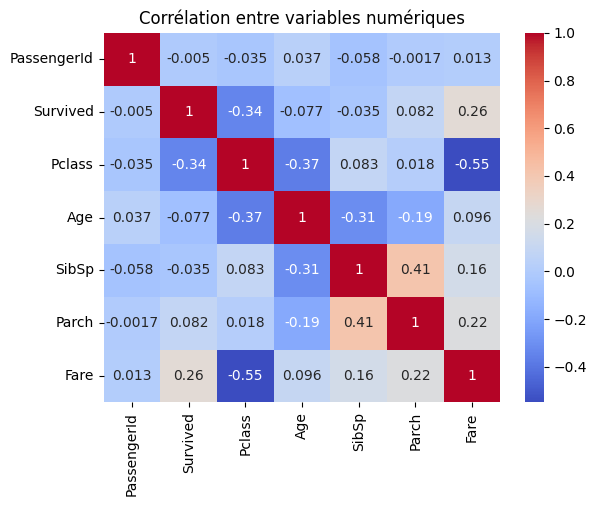

In [131]:
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corr√©lation entre variables num√©riques")
plt.show()

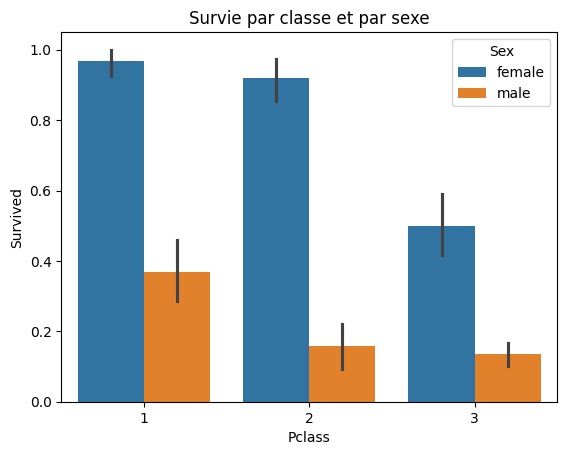

In [132]:
# Graphique crois√© avec hue='Sex' : Montre comment les hommes et les femmes sont affect√©s dans chaque classe.
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
plt.title("Survie par classe et par sexe")
plt.show()

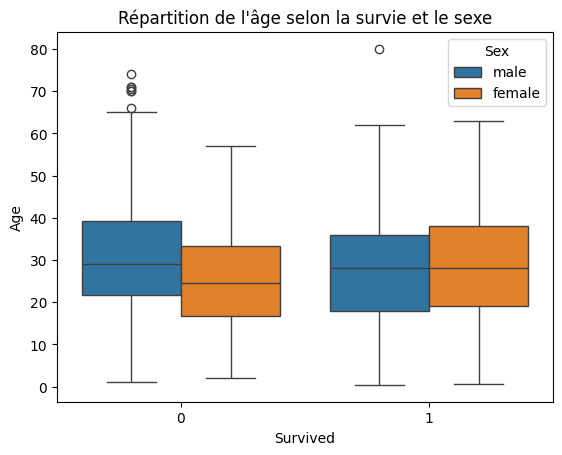

In [106]:
# voir si les femmes ou hommes d‚Äôun certain √¢ge ont √©t√© plus prot√©g√©s.
sns.boxplot(x='Survived', y='Age', hue='Sex', data=train)
plt.title("R√©partition de l'√¢ge selon la survie et le sexe")
plt.show()

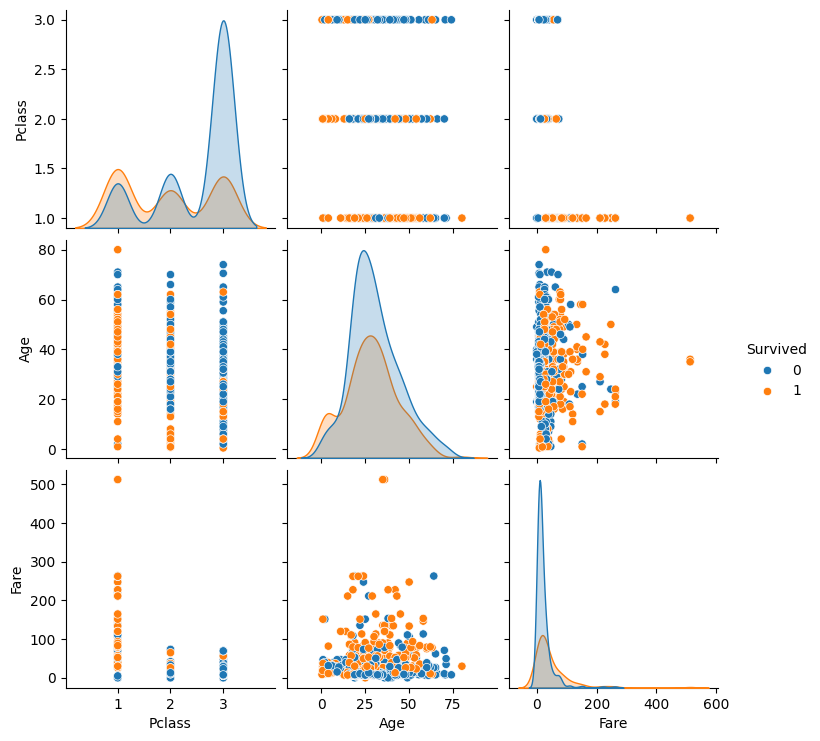

In [133]:
# pour voir  d‚Äôensemble de la relation entre plusieurs variables.
sns.pairplot(train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')
plt.show()

3.  depuis ces visualisations on conclure :

Les femmes et les passagers de 1√®re classe ont √©t√© favoris√©s.

Les hommes de 3e classe ont √©t√© tr√®s d√©savantag√©s.

Les enfants (jeunes) ont eu plus de chance, mais moins que les femmes adultes de premi√®re classe.

L‚Äô√¢ge n‚Äôest pas suffisant seul pour pr√©dire la survie, contrairement au sexe ou √† la classe.

Comment traduire cela en feature engineering ?

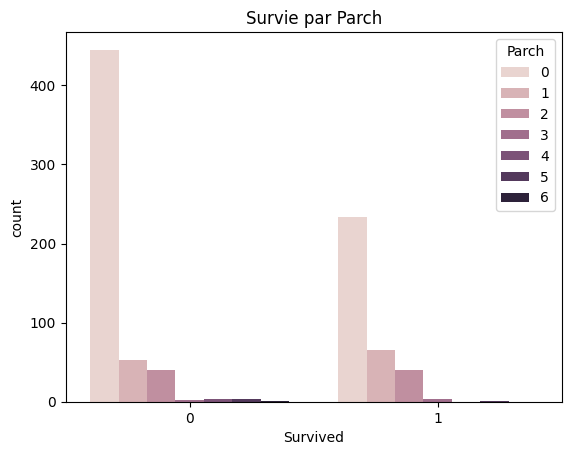

In [134]:
sns.countplot(x='Survived', hue='Parch', data=train)
plt.title('Survie par Parch')
plt.show()

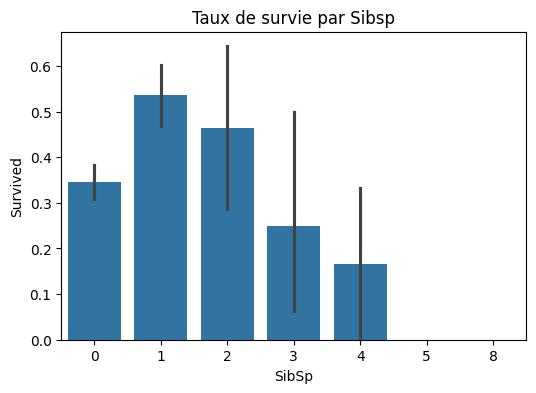

In [135]:
plt.figure(figsize=(6,4))
sns.barplot(x='SibSp', y='Survived', data=train)
plt.title("Taux de survie par Sibsp")
plt.show()

In [140]:

# le train(l‚Äôentra√Ænement)
# Traitement des valeurs manquantes: fillna()
# Remplacer les valeurs manquantes dans la colonne Age
#La m√©diane est moins sensible aux valeurs extr√™mes (outliers) que la moyenne.
#La m√©diane est une mesure statistique qui repr√©sente la valeur centrale d‚Äôune s√©rie de donn√©es tri√©e dans l‚Äôordr croi ou d√©croi
# inplace=True c a d effectuer l‚Äôop√©ration directement sur l‚Äôobjet sans retourner de copie.
#inplace=True = modification sur place / inplace=False (par d√©faut) = retourne une copie modifi√©e
train['Age'].fillna(train['Age'].median(), inplace=True)
# Remplacer les valeurs manquantes dans la colonne Embarked (port d‚Äôembarquement) par fillna().
# mode()[0] : La mode est la valeur la plus fr√©quente.
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# le test(la pr√©diction)
test['Age'].fillna(test['Age'].median(), inplace=True)
# remplace les valeurs manquantes dans la colonne Fare (prix du billet) par la m√©diane de cette colonne.
# Pour √©viter les erreurs lors de l‚Äôentra√Ænement ou de la pr√©diction.
test['Fare'].fillna(test['Fare'].median(), inplace=True)

/tmp/ipykernel_922/2116970578.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipykernel_922/2116970578.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [141]:
# Encodage des variables
# transforme la variable cat√©gorielle Sex en variable num√©rique 
#dans le jeu d'entra√Ænement (train)/ et (test)
# map() permet de remplacer les valeurs texte par des nombres. 'male'= 0/'female'= 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

#l‚Äôencodage de la colonne Embarked 
#pd.get_dummies() pour cr√©er une colonne binaire (0/1) pour chaque valeur possible
#drop_first=True pour √©viter redondance, garde cat√©gories significatives.
#en supprimant la premi√®re cat√©gorie 
# (par ex : si on a 'C', 'Q', 'S' ‚Üí on garde seulement 'Q' et 'S' ‚Üí 'C' devient la cat√©gorie de base implicite).
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)


In [142]:
#cr√©ation  une nouvelle colonne FamilySize dans le df train.
#FamilySize c'est le total des membres de la famille pr√©sents sur le bateau sans hors la personne elle-m√™me.
#family size = SibSp cad (nombre de fr√®res/s≈ìurs/√©poux √† bord)  +   Parch cad (nombre de parents/enfants √† bord).
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

#cr√©e une nouvelle colonne IsAlone
#Elle vaut 1 si la personne est seule √† bord ( c a d FamilySize == 0). Elle vaut 0 sinon.
#.astype(int) : c'est pour convertir  le r√©sultat True/False en 1/0.
train['IsAlone'] = (train['FamilySize'] == 0).astype(int)
test['IsAlone'] = (test['FamilySize'] == 0).astype(int)


In [153]:
#Cr√©er une variable binaire IsWomanOrChild : 1 si femme ou enfant ‚Üí meilleur taux de survie.
train['IsWomanOrChild'] = ((train['Sex'] == 1) | (train['Age'] < 12)).astype(int)
test['IsWomanOrChild'] = ((test['Sex'] == 1) | (test['Age'] < 12)).astype(int)


In [154]:
# Combiner Sex et Pclass en une seule variable: Nouvelle variable cat√©gorielle : female_1, male_3
train['Sex_Pclass'] = train['Sex'].astype(str) + "_" + train['Pclass'].astype(str)
test['Sex_Pclass'] = test['Sex'].astype(str) + "_" + test['Pclass'].astype(str)

In [145]:
# etape du Supprimer les colonnes inutiles
# supprime les colonnes inutiles dans l‚Äôapprentissage automatique

# S√©lection d'une colonne d‚Äôun df pandas
#cr√©er une variable test_IDs qui servira plus tard √† l‚Äôexport
#alors on prend la colonne PassengerId du jeu de donn√©es test et la stocke dans une nouvelle variable test_IDs.
print(test.columns)
test_IDs = test['PassengerId']

# cr√©e une liste des colonnes √† supprimer: 
#cols_to_drop = [...] :pour cr√©er une liste Python qui sert √† stocker les noms des colonnes que l‚Äôon souhaite supprimer ensuite 
cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
#Name, Ticket, Cabin = donn√©es non trait√©es
#Name : c'est le nom complet du passager est peu utile directement sans traitement sp√©cifique.
# Ticket : trop sp√©cifique et  peu informatif.
# cabin : est contient  beaucoup de valeurs manquantes.
#PassengerId =  c'est un identifiant inutile pour le mod√®le mais on le garde √† part dans test_IDs pour la soumission.

# drop() est une m√©thode de pandas df  utilis√©e pour supprimer des colonnes ou lignes.
# inplace=True : c a d modifie directement le df  sans cr√©er de copie
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'IsAlone'],
      dtype='object')


D'abord il faut faire l'installation d'une biblioth√®que " scikit-learn"  √† Python  :
"scikit-learn" est une biblioth√®que utilis√©e pour cr√©er, entra√Æner et √©valuer des mod√®les de machine learning.

In [ ]:
!pip install scikit-learn
#scikit-learn" est une biblioth√®que utilis√©e pour cr√©er, entra√Æner et √©valuer des mod√®les de machine learning.

In [ ]:
## Importation de la fonction n√©cessaire d‚Äôune biblioth√®que externe (sklearn)
from sklearn.model_selection import train_test_split
#Fonction pour diviser dataset en ensemble d‚Äôentra√Ænement/validation

#cr√©e une nouvelle variable X qui contient toutes les colonnes du df train sauf la colonne 'Survived'.
# pour pr√©pare les donn√©es d‚Äôentr√©e X qui seront utilis√©es pour entra√Æner un mod√®le:
# .drop() : m√©thode pour supprimer une ou plusieurs colonnes d‚Äôun df
# axis=1 : signifie qu‚Äôon supprime une colonne (et non une ligne, qui serait axis=0).
X = train.drop('Survived', axis=1)

# cr√©e un variable y qui contient uniquement la colonne 'Survived',
# (y) va servir de valeur √† pr√©dire par le mod√®le d‚Äôapprentissage automatique.
y = train['Survived']

#divise les donn√©es en deux parties : 
#X_train, y_train : sont les donn√©es pour entra√Æner le mod√®le apres / 
# et X_val, y_val : sont les donn√©es pour valider le mod√®le (c a d le tester).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#train_test_split : fonction de sklearn.model_selection qui s√©pare al√©atoirement les donn√©es en un jeu d‚Äôentra√Ænement et un jeu de validation/test.
#test_size=0.2 : 20 % des donn√©es utiliser dans le jeu de validation, 80 % dans le jeu d'entra√Ænement.
#random_state=42 : il s'agit de fixer la "graine al√©atoire" pour obtenir les m√™mes r√©sultats √† chaque ex√©cution (utile pour la reproductibilit√©).

Pour entra√Æner un mod√®le de machine learning, il est essentiel d‚Äôavoir :

1.un jeu d‚Äôentra√Ænement : pour apprendre,

2.un jeu de validation : pour tester la qualit√© des pr√©dictions sur des donn√©es jamais vues.

Variable et leur Contenu

X:	Donn√©es d‚Äôentr√©e (sans la colonne 'Survived')
y:	Cible (colonne 'Survived')
X_train:	Donn√©es d‚Äôentr√©e pour l‚Äôapprentissage
y_train:	Cibles pour l‚Äôapprentissage
X_val:	Donn√©es d‚Äôentr√©e pour la validation (test)
y_val:	Cibles pour la validation

In [ ]:
from sklearn.svm import LinearSVC
#LinearSVC est un mod√®le SVM lin√©aire pour la classification
from sklearn.pipeline import make_pipeline
#Permet de cha√Æner des √©tapes par exp : scaler + mod√®le
from sklearn.preprocessing import StandardScaler
#Standardisation des donn√©es (centrer/r√©duire) c a d normalisation des donn√©es
from sklearn.datasets import make_classification
#pour g√©n√®re un jeu de donn√©es artificiel pour tester les mod√®les ( Q: est ce que on a besoin ici )

Pourqoui on choisie le modele LinearSVC : 


In [ ]:
#Creation (une pipeline) une suite d'√©tapes de traitement appliqu√©es √† vos donn√©es, dans l‚Äôordre avec pipeline
model = make_pipeline(StandardScaler(), LinearSVC())
#StandardScaler () : pour centrer et r√©duire chaque feature.
#c'est pour  transforme les donn√©es pour qu'elles aient une moyenne de 0 et un √©cart-type de 1.
#l'etape de standarisation ou normalisation est important pour les algorithmes sensibles √† l'√©chelle des donn√©es comme les SVM.
#LinearSVC () c'est un classifieur bas√© sur les machines √† vecteurs de support lin√©aires 
#utilis√© pour les probl√®mes de classification binaire ou multiclasses.
model.fit(X_train, y_train)
#model.fit pour entra√Æner (ajuster) le pipeline sur les donn√©es d‚Äôentra√Ænement

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

Le pipeline va d'abord :

1) Appliquer StandardScaler sur X_train (centrage/r√©duction),

2) Puis entra√Æner le mod√®le LinearSVC sur ces donn√©es transform√©es.

Rq: 
le pipeline est utile car il nous permet de cha√Æner plusieurs √©tapes dans un seul objet r√©utilisable



In [151]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pr√©dictions
y_pred = model.predict(X_val)

# √âvaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.8100558659217877
[[91 14]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
predictions = model.predict(test)

# Creation d'un DataFrame pour la soumission
submission = pd.DataFrame({
    'PassengerId': test_IDs,
    'Survived': predictions
})

# Sauvegarder
submission.to_csv('submission.csv', index=False)

In [ ]:
#Pour tester d'autres mod√®les
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
